# Import libraries, dataset + Data Preprocessing

In [1]:
# Импортируем необходимые базовые библиотеки и методы
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [2]:
# Импортируем наш датасет
dataset = pd.read_csv("pima-indians-diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataset.describe(include = "all")
# Пустых значений у нас нет

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

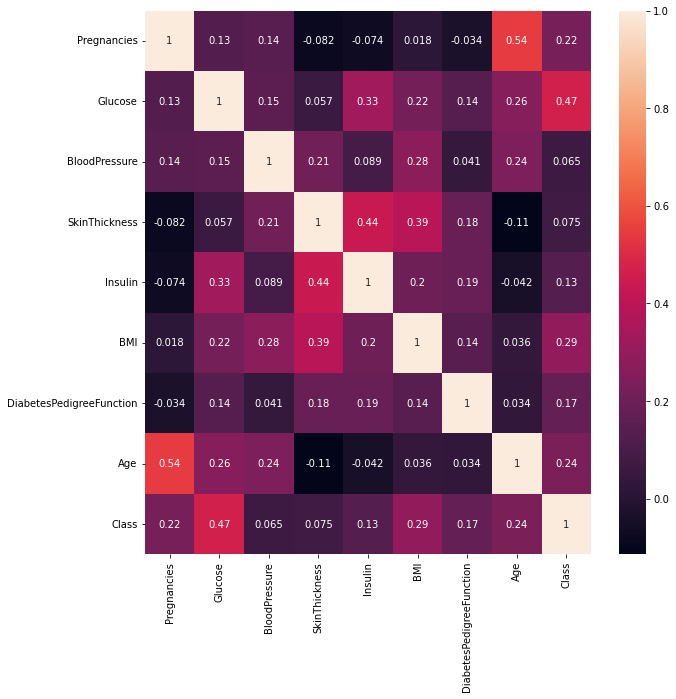

In [4]:
# Построим матрицу корреляций
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=True)

In [5]:
# Самая большая степень корреляции у нас между переменными Pregnancies и Age, что в общем логично
# Также наблюдаем корреляцию между перемнными SkinThickness и Insulin, а также SkinThickness и BMI

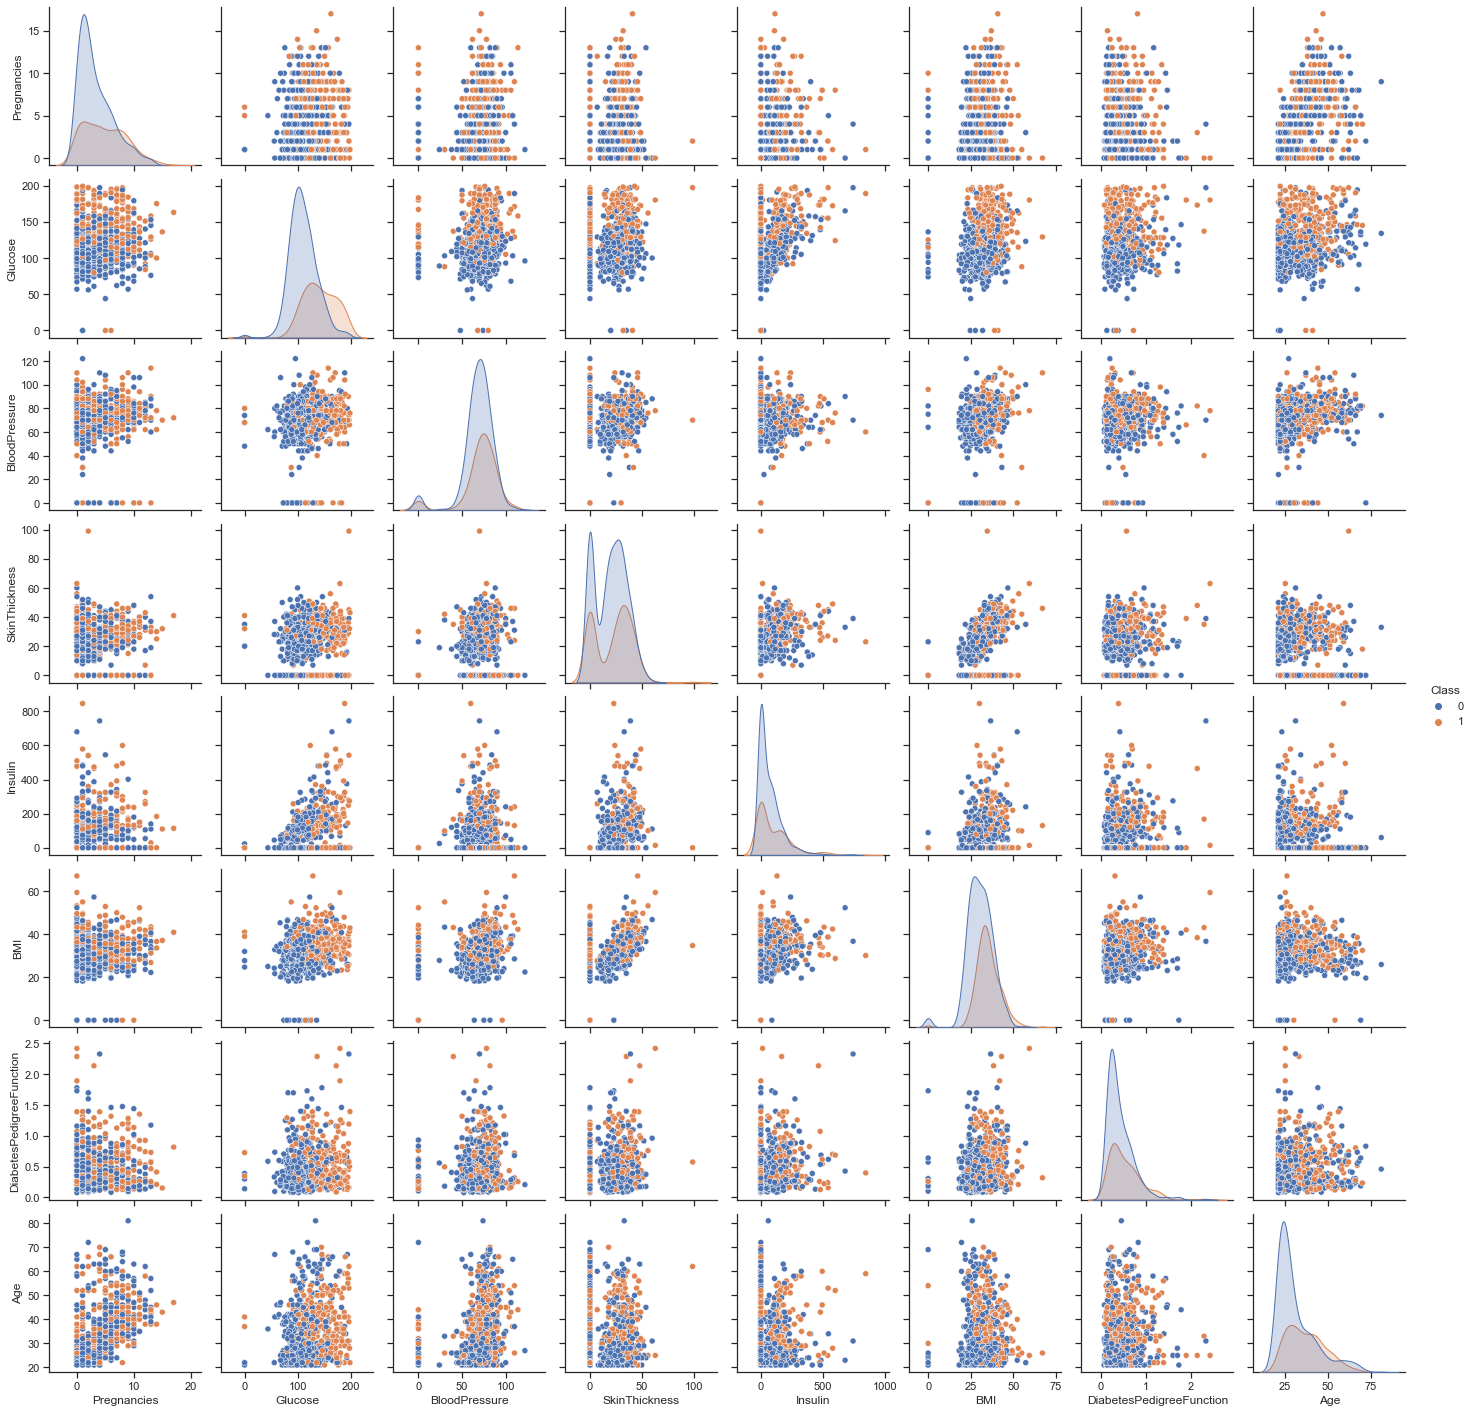

In [6]:
sns.set_theme(style="ticks")
sns.pairplot(dataset, hue="Class")
# Наши классы сбалансированы, распределения близки к нормальному

In [7]:
# Выполним feature scalling
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
print(X_train)

[[-0.52639686 -1.15139792 -3.75268255 ... -4.13525578 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485 ... -0.48916881  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623  ... -0.42452187  0.54916055
  -0.94893896]
 ...
 [ 1.8901091  -0.62029661  0.89659009 ...  1.76054443  1.981245
   0.44308379]
 [-1.13052335  0.62935353 -3.75268255 ...  1.34680407 -0.78487662
  -0.33992901]
 [-1.13052335  0.12949347  1.43720319 ... -1.22614383 -0.61552223
  -1.03594038]]


In [11]:
print(X_test)

[[ 0.68185612 -0.71402038 -0.61712658 ...  0.26073561 -0.11637247
   0.87809089]
 [-0.52639686 -0.27664283  0.30191569 ...  0.48053518 -0.954231
  -1.03594038]
 [-0.52639686 -0.40160784 -0.29275872 ... -0.15300476 -0.9245197
  -1.03594038]
 ...
 [ 1.28598261 -0.80774414  0.13973176 ...  0.62275843  0.04703966
   2.0961108 ]
 [-0.52639686  0.78555979  0.03160914 ... -0.51502758 -0.39268751
  -0.33992901]
 [ 1.28598261 -1.46381046  0.03160914 ...  0.42881763  0.70068816
   0.53008521]]


# Baseline Model - Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
classifier_Logistic = LogisticRegression(random_state = 42)
classifier_Logistic.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [13]:
y_pred1_Logistic = classifier_Logistic.predict(X_test)

In [14]:
cm_Logistic = confusion_matrix(y_test, y_pred1_Logistic)
print(cm_Logistic)
accuracy_score(y_test, y_pred1_Logistic)

[[79 20]
 [18 37]]


0.7532467532467533

In [15]:
roc_auc_score(y_test, y_pred1_Logistic)

0.7353535353535354

In [16]:
# Точность нашей модели составила 75.3%
# Эффективность нашей модели с точки зрения баланса классификации составила 73.5%

# PCA for dimensionality N

In [17]:
# Предварительно сделаем feature scalling на всех наших данных. В нашей базовой модели мы использовали train_test_split
sc2 = StandardScaler()
X_standard = sc2.fit_transform(X)

In [18]:
X_standard

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [19]:
# Всего у нас в модели данных 8 фичей (итого получается 8 мерное пространство)
# Исследуем variance
import sklearn.decomposition as sk_decomposition

pca_all_components = sk_decomposition.PCA()
pca_all_components.fit(X_standard)

print('Explained variance:')
print(pca_all_components.explained_variance_)

print('Explained variance ratio:')
print(pca_all_components.explained_variance_ratio_)

Explained variance:
[2.09711056 1.73346726 1.03097228 0.87667054 0.76333832 0.68351839
 0.42036353 0.40498938]
Explained variance ratio:
[0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855
 0.05247702 0.05055776]


In [20]:
# Также графически визуализируем изменение нашей вариативности, после чего проанализиуем лучшие варианты для последующего применения PCA
components = list(range(1, pca_all_components.n_components_ + 1))
ratios = np.cumsum(pca_all_components.explained_variance_ratio_)
components, ratios

([1, 2, 3, 4, 5, 6, 7, 8],
 array([0.26179749, 0.47819876, 0.60690249, 0.71634362, 0.81163667,
        0.89696522, 0.94944224, 1.        ]))

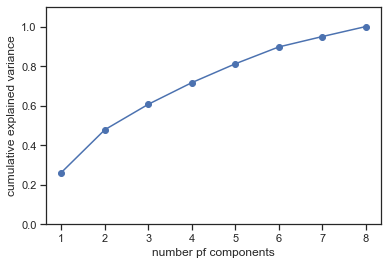

In [21]:
plt.plot(components, ratios, marker = 'o')
plt.xlabel('number pf components')
plt.ylabel('cumulative explained variance')
plt.ylim(0, 1.1)
plt.show()

In [22]:
# Ключевые выводы:
# Числовые значения explained variance показывают нам дллины компонентных векторов. Чем выше значение, тем важнее этот вектор для описания распределения наших данных при понижении размерности
# Значения explained variance ratio показывают нам, сколько определенное количество компонентов дает нам процентов вариативности. Другими словами,
# например 5 компонентов дают нам около 81% вариативности (то есть при понижении размерности до 5 мерного проттранства PCA нашел способ, чтобы сохранить 81% информации)
# Также исходя из графика видим, что у нас нет фичей, которыми мы можем пренебречь в плане сохранения максимальной вариативности
# При понижении размерности даже на одно измерение, мы около 5% данных все равно потеряем
# Возможно вариант с понижением размерности до 6 мерного пространства выглядит более оптимальным (так как прирост сохранения вариативности был на уровне 9%, а затем резко падает до 5%). Плюс почти 90% данных мы сохраняем.
# Отрезок с наиболее высоким значением вариантивности (90-99%) - использование 6, 7 измерений
# Теперь, чтобы оценить эффективность наших предположений, попробуем построить 3 новых модели Logistic Regression (для самых оптимальных вариантов - 6 и 7). И построим еще одну дополнительную модель с понижением пространства до двухмерного

# Models with different n_components for PCA

In [23]:
# Модель для n_components = 6
pca_6_components = sk_decomposition.PCA(n_components = 6)
principal_components_for6_train = pca_6_components.fit_transform(X_train)
principal_components_for6_test = pca_6_components.fit_transform(X_test)

In [24]:
classifier_Logistic6 = LogisticRegression(random_state = 42)
classifier_Logistic6.fit(principal_components_for6_train, y_train)

LogisticRegression(random_state=42)

In [25]:
y_pred1_Logistic6 = classifier_Logistic6.predict(principal_components_for6_test)

In [26]:
cm_Logistic6 = confusion_matrix(y_test, y_pred1_Logistic6)
print(cm_Logistic6)
accuracy_score(y_test, y_pred1_Logistic6)

[[78 21]
 [45 10]]


0.5714285714285714

In [27]:
roc_auc_score(y_test, y_pred1_Logistic6)

0.48484848484848486

In [28]:
# Точность нашей модели составила 57.1%
# Эффективность нашей модели с точки зрения баланса классификации составила 48.5%

In [29]:
# Модель для n_components = 7
pca_7_components = sk_decomposition.PCA(n_components = 7)
principal_components_for7_train = pca_7_components.fit_transform(X_train)
principal_components_for7_test = pca_7_components.fit_transform(X_test)

In [30]:
classifier_Logistic7 = LogisticRegression(random_state = 42)
classifier_Logistic7.fit(principal_components_for7_train, y_train)

LogisticRegression(random_state=42)

In [31]:
y_pred1_Logistic7 = classifier_Logistic7.predict(principal_components_for7_test)

In [32]:
cm_Logistic7 = confusion_matrix(y_test, y_pred1_Logistic7)
print(cm_Logistic7)
accuracy_score(y_test, y_pred1_Logistic7)

[[78 21]
 [46  9]]


0.564935064935065

In [33]:
roc_auc_score(y_test, y_pred1_Logistic7)

0.4757575757575757

In [34]:
# Точность нашей модели составила 56.5%
# Эффективность нашей модели с точки зрения баланса классификации составила 47.6%

In [35]:
# Модель для n_components = 2
pca_2_components = sk_decomposition.PCA(n_components = 2)
principal_components_for2_train = pca_2_components.fit_transform(X_train)
principal_components_for2_test = pca_2_components.fit_transform(X_test)

In [36]:
classifier_Logistic2 = LogisticRegression(random_state = 42)
classifier_Logistic2.fit(principal_components_for2_train, y_train)

LogisticRegression(random_state=42)

In [37]:
y_pred1_Logistic2 = classifier_Logistic2.predict(principal_components_for2_test)

In [38]:
cm_Logistic2 = confusion_matrix(y_test, y_pred1_Logistic2)
print(cm_Logistic2)
accuracy_score(y_test, y_pred1_Logistic2)

[[64 35]
 [42 13]]


0.5

In [39]:
roc_auc_score(y_test, y_pred1_Logistic2)

0.44141414141414137

In [40]:
# Точность нашей модели составила 50%
# Эффективность нашей модели с точки зрения баланса классификации составила 44.1%

In [41]:
# Выводы касательно изменения точности модели с разными вариантами уменьшения размерности
# Главная странность, которая бросается в глаза - это увеличение точности и roc_auc модели с размерностью 6 по сравнению с моделью с размерностью 7   
# Это очень странно, так как в модели с 7 измерениями вариативность данных сохранена больше. Сначало думал, возможно дело в алгоритме, так как вначале в качестве базовой модели использовал случайный лес вместо логистической регрессии
# Однако при замене алгоритма, динамика абсолютно та же (хотя логистическая регрессия по идее должна работать лучше с PCA, так как и там и там работа с линейными зависимостями)
# Исключая этот момент, то наблюдаем значительное понижение точности нашей модели вплоть до 50% при уменьшение размерности до двухмерного. Логика соблюдается, хотя и заметен очень резкий скачок падения точности при любом варианте использования PCA

In [42]:
principal_components_for2_train

array([[-4.94171221, -0.52509823],
       [ 0.91551014,  1.7735786 ],
       [-0.63427633, -1.15389327],
       ...,
       [ 1.92888111,  0.70611422],
       [-1.83131415, -0.84724992],
       [-1.40520075, -0.08972745]])

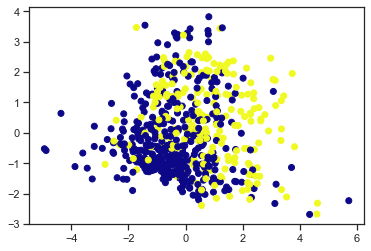

In [43]:
# Визуализируем наши тренировочные данные в двухмерном пространстве
plt.scatter(principal_components_for2_train[:, 0], principal_components_for2_train[:, 1], c = y_train, cmap = "plasma")
# Отметим момент значительного перекрытия классов, который сразу бросается в глаза

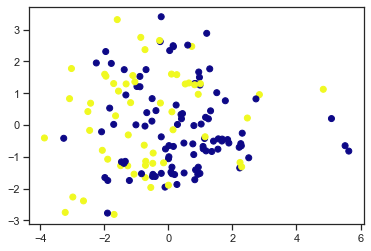

In [44]:
# Визуализируем наши тестовые данные
plt.scatter(principal_components_for2_test[:, 0], principal_components_for2_test[:, 1], c = y_test, cmap = "plasma")
# Также наблюдаем значительное перекрытие классов

<AxesSubplot:>

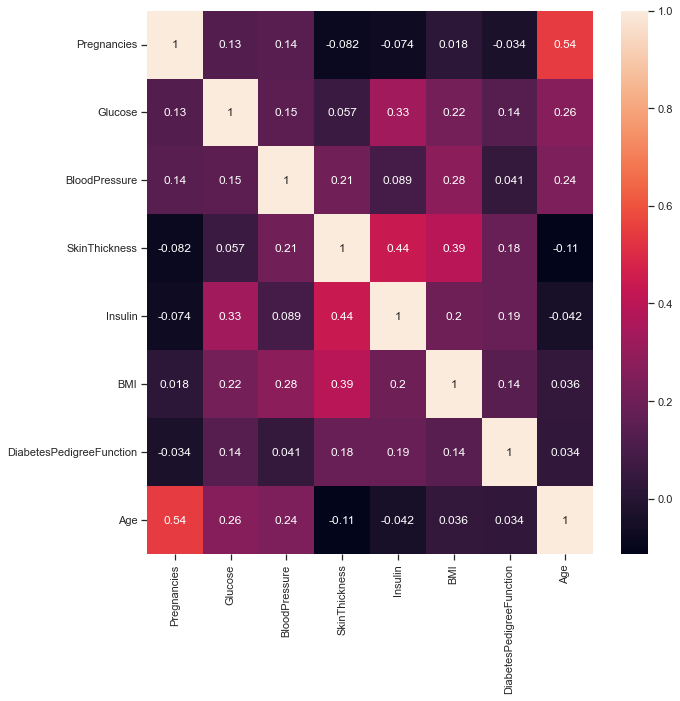

In [45]:
# Напоследок также проанализируем, как изменяется корреляция фичей в нашей модели
# Построим повторно базовую матрицу
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.drop("Class", axis = 1).corr(), annot=True)

In [46]:
pca_all_8_components = sk_decomposition.PCA(n_components = 8)
principal_components_all_8 = pca_all_8_components.fit_transform(dataset.drop("Class", axis = 1))

In [47]:
principal_components_all_8

array([[-75.71465491, -35.95078264,  -7.26078895, ...,   3.46044187,
         -0.70204701,   0.09497708],
       [-82.3582676 ,  28.90821322,  -5.49667139, ...,   5.59026239,
         -2.57201489,  -0.09153472],
       [-74.63064344, -67.90649647,  19.46180812, ...,   7.1443674 ,
          4.279067  ,   0.27101062],
       ...,
       [ 32.11319827,   3.3766648 ,  -1.58786446, ...,   6.23903802,
          1.72506482,  -0.21152797],
       [-80.21449431, -14.18601977,  12.3512639 , ...,  -2.84230707,
         -5.12792839,  -0.09719132],
       [-81.30814972,  21.62149606,  -8.15276833, ...,   3.17347633,
         -1.28032403,  -0.1316886 ]])

<AxesSubplot:>

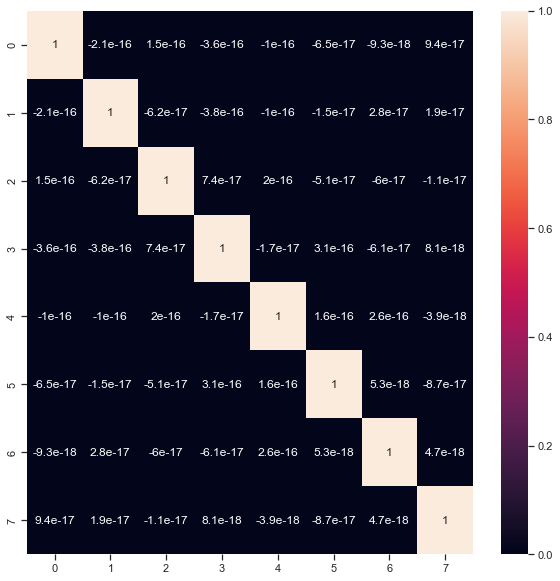

In [48]:
# Построим новую корреляционную матрицу
plt.figure(figsize=(10, 10))
sns.heatmap(pd.DataFrame(principal_components_all_8).corr(), annot=True)
# Корреляционные связи вообще пропали. Пространственная трансформация явно их практически убрала. Думаю очень полезная штука в определенных ситуациях

# Use tSNE Alghoritm

In [49]:
# Теперь проделаем те же самые трансформации как с PCA, только использовав tSNE
# Главное их отличие в том, что алгоритм PCA - линейный, а tSNE - нелинейный
from sklearn.manifold import TSNE

# Модель для n_components = 2
tsne_2_components = TSNE(n_components=2, random_state = 10)
tsne_principal_components_for2_train = tsne_2_components.fit_transform(X_train)
tsne_principal_components_for2_test = tsne_2_components.fit_transform(X_test)

In [50]:
classifier_Logistic2_tsne = LogisticRegression(random_state = 42)
classifier_Logistic2_tsne.fit(tsne_principal_components_for2_train, y_train)

LogisticRegression(random_state=42)

In [51]:
y_pred1_Logistic2_tsne = classifier_Logistic2_tsne.predict(tsne_principal_components_for2_test)

In [52]:
cm_Logistic2_tsne = confusion_matrix(y_test, y_pred1_Logistic2_tsne)
print(cm_Logistic2_tsne)
accuracy_score(y_test, y_pred1_Logistic2_tsne)

[[99  0]
 [55  0]]


0.6428571428571429

In [53]:
roc_auc_score(y_test, y_pred1_Logistic2_tsne)

0.5

In [54]:
# Интересный момент, у нас на 100% предсказывается класс 0, но на 0% предсказывается класс 1. Попробуем исправить это при помощи параметра class_weight = "balanced"

In [55]:
classifier_Logistic2_tsne = LogisticRegression(class_weight = "balanced", random_state = 42)
classifier_Logistic2_tsne.fit(tsne_principal_components_for2_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [56]:
y_pred1_Logistic2_tsne = classifier_Logistic2_tsne.predict(tsne_principal_components_for2_test)

In [57]:
cm_Logistic2_tsne = confusion_matrix(y_test, y_pred1_Logistic2_tsne)
print(cm_Logistic2_tsne)
accuracy_score(y_test, y_pred1_Logistic2_tsne)

[[82 17]
 [42 13]]


0.6168831168831169

In [58]:
roc_auc_score(y_test, y_pred1_Logistic2_tsne)

0.5323232323232323

In [59]:
# Итого точность нашей модели составила 61.7%, что на 11.7% больше чем в варианте с PCA. Значительный прирост
# roc_auc равен 53.2%, что также на 9.1% больше чем в варианте с PCA. Также значительный прирост
# в данном сравнении алгоритм tsne показал себя явно получше в двухмерном пространстве. Немного удивился даже. Но есть один важный нюанс, который опишу немного позже
# Визуализируем вариант с tsne и сравним с визуализацией с pca
# Визуально, немного кажется, что один класс находится вокруг окраин другого

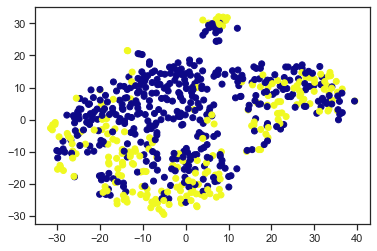

In [60]:
plt.scatter(tsne_principal_components_for2_train[:, 0], tsne_principal_components_for2_train[:, 1], c = y_train, cmap = "plasma")

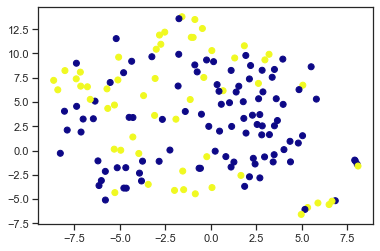

In [61]:
plt.scatter(tsne_principal_components_for2_test[:, 0], tsne_principal_components_for2_test[:, 1], c = y_test, cmap = "plasma")

In [62]:
# По визуализации видно нелинейности, в отличие от PCA, но перекрытие классов все также очень значительное
# Также визуально, немного кажется, что один класс находится вокруг окраин другого

In [63]:
# Сделаем варианты с n_components=6 и n_components=7

In [64]:
# Модель для n_components = 6
tsne_6_components = TSNE(method = "exact", n_components=6, random_state = 42)
tsne_principal_components_for6_train = tsne_6_components.fit_transform(X_train)
tsne_principal_components_for6_test = tsne_6_components.fit_transform(X_test)

In [65]:
classifier_Logistic6_tsne = LogisticRegression(class_weight = "balanced", random_state = 42)
classifier_Logistic6_tsne.fit(tsne_principal_components_for6_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [66]:
y_pred1_Logistic6_tsne = classifier_Logistic6_tsne.predict(tsne_principal_components_for6_test)

In [67]:
cm_Logistic6_tsne = confusion_matrix(y_test, y_pred1_Logistic6_tsne)
print(cm_Logistic6_tsne)
accuracy_score(y_test, y_pred1_Logistic6_tsne)

[[53 46]
 [18 37]]


0.5844155844155844

In [68]:
roc_auc_score(y_test, y_pred1_Logistic6_tsne)

0.604040404040404

In [69]:
# Точность практически одинакова с pca, однако auc гораздо выше

In [70]:
# Модель для n_components = 7
tsne_7_components = TSNE(method = "exact", n_components=7, random_state = 42)
tsne_principal_components_for7_train = tsne_7_components.fit_transform(X_train)
tsne_principal_components_for7_test = tsne_7_components.fit_transform(X_test)

In [71]:
classifier_Logistic7_tsne = LogisticRegression(class_weight = "balanced", random_state = 42)
classifier_Logistic7_tsne.fit(tsne_principal_components_for7_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [72]:
y_pred1_Logistic7_tsne = classifier_Logistic7_tsne.predict(tsne_principal_components_for7_test)

In [73]:
cm_Logistic7_tsne = confusion_matrix(y_test, y_pred1_Logistic7_tsne)
print(cm_Logistic7_tsne)
accuracy_score(y_test, y_pred1_Logistic7_tsne)

[[54 45]
 [28 27]]


0.525974025974026

In [74]:
roc_auc_score(y_test, y_pred1_Logistic7_tsne)

0.5181818181818182

In [75]:
# Точность ниже, однако auc немного выше.

In [76]:
# Важное уточнение касательно работы tsne!!! Точность и auc значительно меняются в зависимости от рандома образцов (параметр random state в TSNE)
# Разнобой показателей достаточно большой и составляет 10-20%. В PCA такое не наблюдается.